# **Data Diri**

---
(Peserta Kampus merdeka - Student Indepentdent)


Nama : Gusti Muhammad Aulia Nur Sulthan

Alamat :  Kabupaten Hulu Sungai Selatan, Kalimantan Selatan

SIB Id : M247R6216

SIB Email : M247R6216@dicoding.org	

SIB Group : M3


# Introduction
Proyek ini merupakan submission dari [Dicoding]('www.dicoding.com') dan pada proyek kedua ini disuruh membuat **Sistem Rekomendasi**.

## Download Package

In [ ]:
! pip install opendatasets

## Libraries
Library umum yang digunakan pada notebook 

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn')

## Data Understanding
![image](https://user-images.githubusercontent.com/76864673/140640142-57306111-f34e-4223-99a7-4d970aba3867.png)


Datasets ini di ambil dari [Kaggle](https://www.kaggle.com/sunilgautam/movielens), dalam datasets ini terdiri dari 5 file csv yaitu :

* README.txt
* links.csv
* ratings.csv
* movies.csv
* tags.csv

dalam proyek sistem rekomendasi kali ini saya hanya menggunakan 2 file yaitu : `movies.csv` & `ratings.csv`

### Load Datasets

In [ ]:
od.download('https://www.kaggle.com/sunilgautam/movielens') #27c6756f2debb886a1d3f567bc77fedf

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tnnz20
Your Kaggle Key: ··········


100%|██████████| 971k/971k [00:00<00:00, 73.3MB/s]

### Read Datasets

In [ ]:
movies = pd.read_csv('/content/movielens/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/movielens/ml-latest-small/ratings.csv')

### Univariate Exploratory Data Analysis

#### Variable _movies_ 
Keterangan :
* `movieId` = Id dari movie (int64)
* `title` = Judul dari movie beserta tahun rilisnya (object)
* `genres` = Genre dari movie (object)

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


##### Check Missing value

In [ ]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

##### Check Total data unique

In [ ]:
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

##### Check Data duplicate

In [ ]:
movies.duplicated().sum()

0

##### Visualisasi *Tahun* 
Pertama pisahkan tahun yang berada di kolom title ke dalam kolom baru

In [ ]:
# Deklarasi variable baru
movies_year = movies.copy()

# Extract Tahun di dalam title
movies_year['year'] = movies['title'].str.extract('(\d+)').astype(float)
movies_year.year.dropna(inplace=True)

Karena ada beberapa judul yang tidak memiliki tahun saya seleksi

In [ ]:
x = movies_year[movies_year['year'] > 1000.0]
x.year.astype(int)
data = x

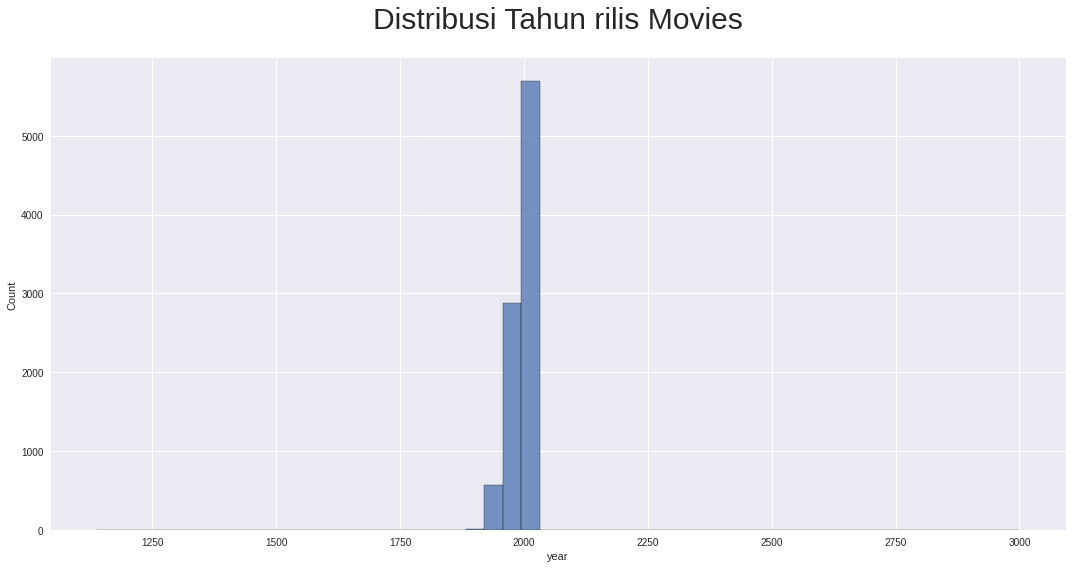

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data, x='year',bins=50)
plt.title('Distribusi Tahun rilis Movies', fontsize=30, pad=30)
plt.tight_layout()
plt.show()



> Terlihat pada grafik histogram di atas rata - rata movies rilis pada rentang tahun 1990 - 2000 ke atas



##### Visualisasi *Genre*
Dalam visualisasi genre langkah pertama yang dilakukan adalah memisahkan genre apa saja yang ada dalam movie ini, lalu membuat kolom baru pada data yang berisi genre.

In [ ]:
# membuat list untuk menampung genre
movies_genres = movies.copy()
genres=[]
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)
genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [ ]:
# Tambah kolom genres ke dalam movies_genres
for x in genres:
    movies_genres[x] = 0

for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        movies_genres[x][i]=1

movies_genres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


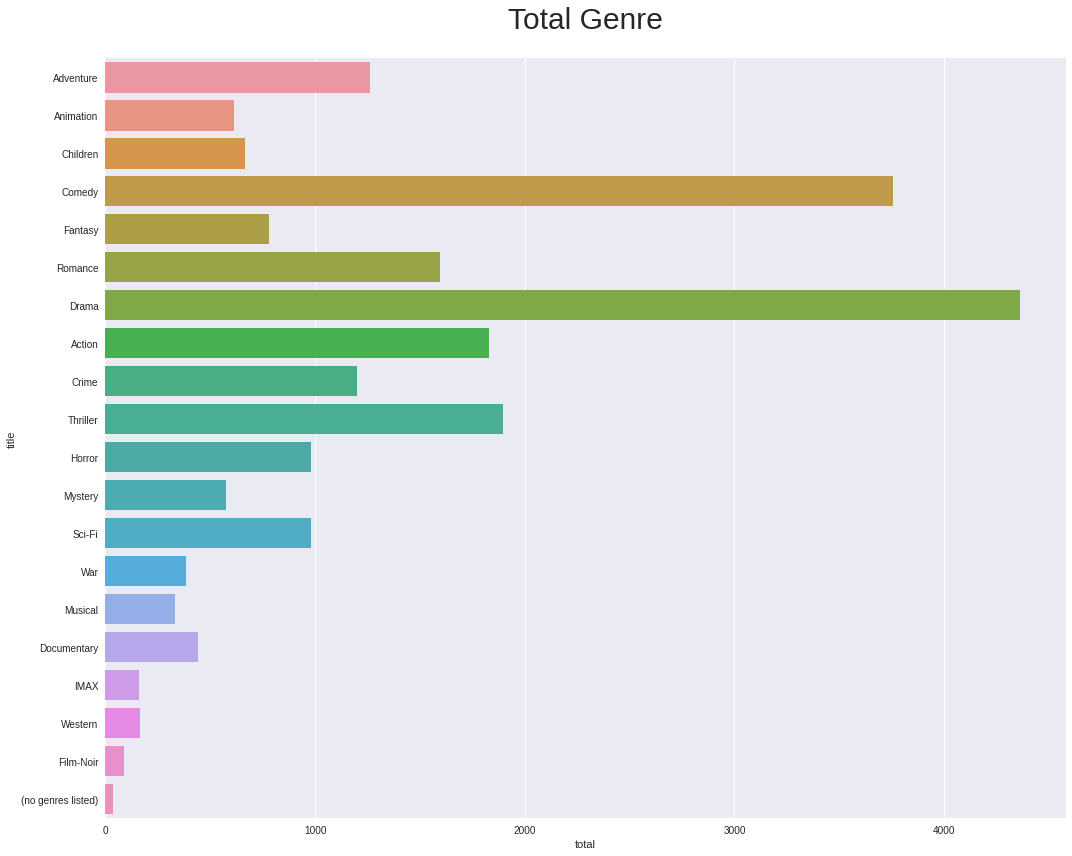

In [ ]:
view = movies_genres.iloc[:,3:].sum().reset_index()
view.columns = ['title','total']

plt.figure(figsize=(15,12))
sns.barplot(y='title',x='total',data=view)
plt.title('Total Genre', fontsize=30, pad=30)
plt.tight_layout()
plt.show()



> Terlihat pada gambar di atas genre `Drama` yang paling banyak dan diikuti oleh genre `Comedy` lalu ada beberapa movies yang tidak memiliki genre `no genres listed`


#### *ratings* Variable
Keterangan :
* `userId` = Id pengguna (int64)
* `movieId` = Id film yang di rating (int64)
* `rating` = Skor dari rating yang diberikan (float64)
* `timestamp` = Waktu saat rating diberikan (int64)

In [ ]:
print(f'Jumlah userId yang memberi rating : {ratings.userId.nunique()}')
print(f'Jumlah movieId yang diberi rating oleh user : {ratings.movieId.nunique()}')

Jumlah userId yang memberi rating : 610
Jumlah movieId yang diberi rating oleh user : 9724


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


##### Check Missing value

In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

##### Check Total data unique

In [ ]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

##### Check Data duplicate

In [ ]:
ratings.duplicated().sum()

0

##### Check Total value rating

In [ ]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

> Dalam data ini rating diberikan dengan range 0-5 dengan skala 0.5 

##### Visualisasi Rating movies tertinggi
pada visualisasi ini langkah pertama yang dilakukan adalah menggabungkan `rating` dengan `movies` lalu mendrop kolom yang tidak digunakan

In [ ]:
rating_movies = pd.merge( ratings, movies, on='movieId', how='inner')
rating_movies.drop(['timestamp','genres'],axis=1, inplace=True)
rating_movies

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


setelah itu membuat variable yang menampung total rating yang dimiliki setiap judul

In [ ]:
rating_movies_count = rating_movies.groupby('title')['rating'].count()
rating_movies_count = pd.DataFrame(rating_movies_count).reset_index().rename(columns={'rating':'total_rating'})
rating_movies_count

,title,total_rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


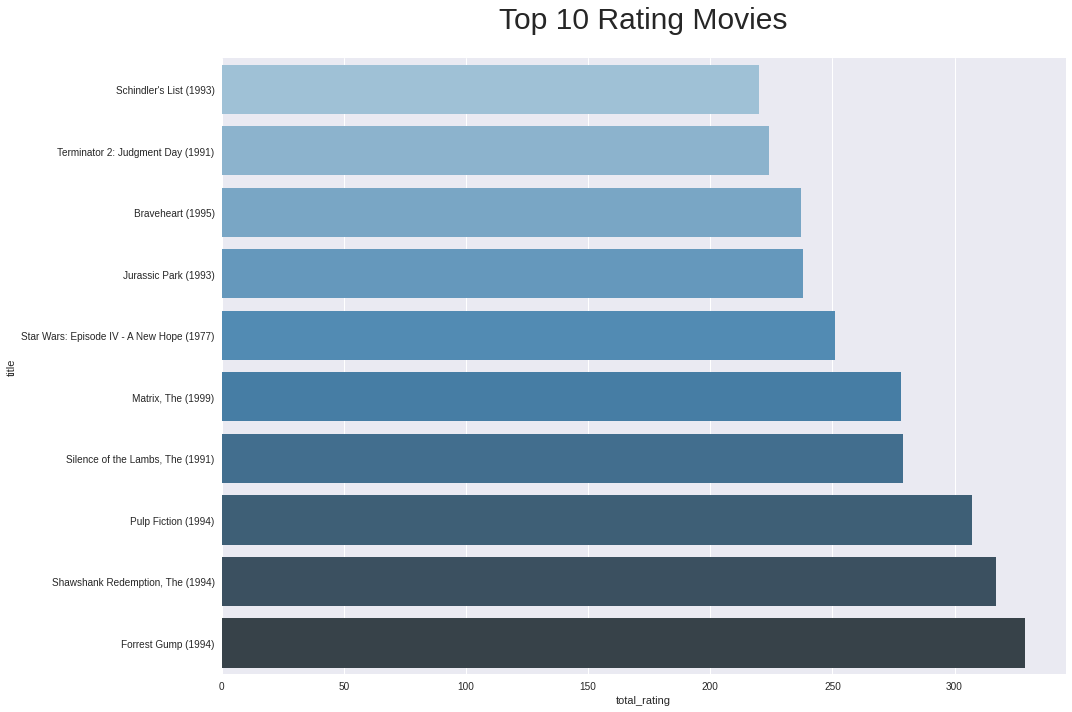

In [ ]:
data = rating_movies_count.sort_values(by ='total_rating')

plt.figure(figsize=(15,10))
sns.barplot(data=data.iloc[-10:,:], 
            y='title', x='total_rating',
            palette="Blues_d")
plt.title('Top 10 Rating Movies', pad=30, fontsize=30)
plt.tight_layout()
plt.show()



> Terlihat pada grafik diatas bahwa movies dengan judul `Forrest Gump (1994)` memiliki rating tertingi.


#### Total data

In [ ]:
print(f'Jumlah Data Movie {movies.shape[0]}, dan memiliki {movies.shape[1]} kolom')
print(f'Jumlah Data Rating {ratings.shape[0]}, dan memiliki {ratings.shape[1]} kolom')

Jumlah Data Movie 9742, dan memiliki 3 kolom
Jumlah Data Rating 100836, dan memiliki 4 kolom


## Data Preparation
Dalam persiapan data yang saya lakukan adalah sebagai berikut :
1. Memastikan tidak ada missing value
2. Sorting `ratings` value berdasarkan userId dan mengubah data tersebut ke dalam integer
3. Mendrop data duplicate
4. Mengabungkan data `ratings` dengan `movies` setelah itu seleksi value dalam attribut genres yang tidak mengandung np.nan

In [ ]:
# Deklarasi variable
movies = pd.read_csv('/content/movielens/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/movielens/ml-latest-small/ratings.csv')

In [ ]:
# Drop missing value
movies.dropna(axis=0, inplace=True)
ratings.dropna(axis=0, inplace=True)
print('Data sudah bersih dari missing value')

Data sudah bersih dari missing value


In [ ]:
# Sorting ratings
ratings = ratings.sort_values('userId').astype('int')

In [ ]:
# Drop Duplicate data
movies.drop_duplicates(subset=['title'], keep='first', inplace=True)
ratings.drop_duplicates(subset=['userId','movieId'], keep='first', inplace=True)

In [ ]:
# Merge data
merge_df = pd.merge(ratings, movies, how='left', on='movieId')
df = merge_df.copy().drop('timestamp', axis=1)
df

,userId,movieId,rating,title,genres
0,1,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2329,5,American History X (1998),Crime|Drama
2,1,2338,2,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller
3,1,2353,5,Enemy of the State (1998),Action|Thriller
4,1,2366,4,King Kong (1933),Action|Adventure|Fantasy|Horror
...,...,...,...,...,...
100831,610,6387,3,Once a Thief (Zong heng si hai) (1991),Action|Comedy|Crime|Thriller
100832,610,6383,2,"2 Fast 2 Furious (Fast and the Furious 2, The)...",Action|Crime|Thriller
100833,610,6378,3,"Italian Job, The (2003)",Action|Crime
100834,610,6708,3,Matchstick Men (2003),Comedy|Crime|Drama


In [ ]:
# drop missing value dari numpy
df = df[~pd.isnull(df['genres'])]

In [ ]:
df.shape

(100830, 5)

## Model Deployment
Model machine learning yang digunakan untuk menyelesaikan permasalahan ini ada 2, yaitu:

* Content Based Filtering
* Collaborative Filtering

### Model Content Based Filtering


#### TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')

# Melakukan perhitungan idf pada data movies
tf.fit(movies['genres']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

#### Transform data

In [ ]:
tfidf_matrix = tf.fit_transform(movies['genres']) 
tfidf_matrix.shape

(9737, 23)

#### Menghitung Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81357359, 0.15270879, ..., 0.        , 0.42101966,
        0.2675912 ],
       [0.81357359, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15270879, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57067944],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42101966, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2675912 , 0.        , 0.57067944, ..., 0.        , 0.        ,
        1.        ]])

#### Membuat Dataframe baru menggunakan cosine similarity

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'],
                             columns=movies['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix tiap movie
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9737, 9737)


title,Last Action Hero (1993),"4 Months, 3 Weeks and 2 Days (4 luni, 3 saptamâni si 2 zile) (2007)",Taxi to the Dark Side (2007),Ghost Town (2008),Baby Mama (2008),George of the Jungle (1997),Primeval (2007),Only Angels Have Wings (1939),Greenberg (2010),Ricki and the Flash (2015)
title,,,,,,,,,,
"Woman of Paris, A (1923)",0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.399315,0.678501,0.678501
"Green Ray, The (Rayon vert, Le) (1986)",0.000000,0.540179,0.0,0.481366,0.0,0.0,0.000000,0.739228,0.366512,0.366512
Amityville: A New Generation (1993),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.780861,0.000000,0.000000,0.000000
Coraline (2009),0.375313,0.000000,0.0,0.436448,0.0,0.0,0.284410,0.000000,0.000000,0.000000
The 5th Wave (2016),0.262906,0.000000,0.0,0.000000,0.0,0.0,0.267483,0.332507,0.000000,0.000000
Falling Down (1993),0.387857,0.559348,0.0,0.000000,0.0,0.0,0.000000,0.223356,0.379518,0.379518
In Time (2011),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.266349,0.000000,0.000000,0.000000
And Your Mother Too (Y tu mamá también) (2001),0.000000,0.540179,0.0,0.481366,0.0,0.0,0.000000,0.739228,0.366512,0.366512
Anything for Love (2016),0.000000,0.000000,0.0,0.571999,0.0,0.0,0.000000,0.622097,0.000000,0.000000


### Model Collaborative  Filtering

In [ ]:
df.head()

,userId,movieId,rating,title,genres
0,1,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2329,5,American History X (1998),Crime|Drama
2,1,2338,2,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller
3,1,2353,5,Enemy of the State (1998),Action|Thriller
4,1,2366,4,King Kong (1933),Action|Adventure|Fantasy|Horror


#### Encode *userId*

In [ ]:
# Mengubah unique userId menjadi list
user_id = df['userId'].unique().tolist()
print(f'list userId: {user_id}')
 
# Encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print(f'\nencoded userId : {user_to_user_encoded}')
 
# Encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

print(f'\nencoded angka ke userId: {user_encoded_to_user}')

list userId: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

#### Encode *movieId*

In [ ]:
# Mengubah unique userId menjadi list
movie_id = df['movieId'].unique().tolist()
print(f'list movieId: {movie_id}')
 
# Encoding userId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_id)}
print(f'\nencoded movieId : {movie_to_movie_encoded}')
 
# Encoding angka ke userId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_id)}

print(f'\nencoded angka ke movieId: {movie_encoded_to_movie}')

list movieId: [1, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2291, 2640, 2273, 2253, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2268, 2641, 2644, 2648, 3247, 3253, 3273, 3386, 3439, 3440, 3441, 3448, 3450, 3479, 3489, 3527, 3578, 3617, 3639, 3671, 3702, 3703, 3729, 3740, 3744, 3793, 3809, 4006, 5060, 3243, 3176, 3168, 3062, 2654, 2657, 2692, 2700, 2716, 2761, 2797, 2826, 2858, 2872, 2899, 2916, 2000, 2944, 2948, 2949, 2959, 2985, 2987, 2991, 2993, 2997, 3033, 3034, 3052, 3053, 2947, 1967, 3147, 1927, 543, 552, 553, 590, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 527, 1031, 500, 457, 1954, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 480, 1032

#### Mapping

In [ ]:
# Mapping user_id ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping movie_id ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [ ]:
df

,userId,movieId,rating,title,genres,user,movie
0,1,1,4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0
1,1,2329,5,American History X (1998),Crime|Drama,0,1
2,1,2338,2,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller,0,2
3,1,2353,5,Enemy of the State (1998),Action|Thriller,0,3
4,1,2366,4,King Kong (1933),Action|Adventure|Fantasy|Horror,0,4
...,...,...,...,...,...,...,...
100831,610,6387,3,Once a Thief (Zong heng si hai) (1991),Action|Comedy|Crime|Thriller,609,2097
100832,610,6383,2,"2 Fast 2 Furious (Fast and the Furious 2, The)...",Action|Crime|Thriller,609,3351
100833,610,6378,3,"Italian Job, The (2003)",Action|Crime,609,1370
100834,610,6708,3,Matchstick Men (2003),Comedy|Crime|Drama,609,2538


#### Cek jumlah user, jumlah movie, dan mengubah nilai rating menjadi float.

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
 
# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
print(f'Number of User : {num_users}')
print(f'Number of Movie : {num_movie}')
print(f'Min rating : {min_rating}')
print(f'Max rating : {max_rating}')

Number of User : 610
Number of Movie : 9719
Min rating : 0.0
Max rating : 5.0


#### Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,title,genres,user,movie
27969,191,99,5.0,Heidi Fleiss: Hollywood Madam (1995),Documentary,190,5551
44012,294,2060,2.0,BASEketball (1998),Comedy,293,1463
70876,453,3536,4.0,Keeping the Faith (2000),Comedy|Drama|Romance,452,1520
6188,42,292,3.0,Outbreak (1995),Action|Drama|Sci-Fi|Thriller,41,660
34902,233,2858,3.0,American Beauty (1999),Drama|Romance,232,96
...,...,...,...,...,...,...,...
6266,42,1101,5.0,Top Gun (1986),Action|Romance,41,797
54890,364,783,3.0,"Hunchback of Notre Dame, The (1996)",Animation|Children|Drama|Musical|Romance,363,552
76824,480,597,3.0,Pretty Woman (1990),Comedy|Romance,479,468
860,6,261,4.0,Little Women (1994),Drama,5,479


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

#### Model Training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import  EarlyStopping

class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()]]
)
callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=7,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
10083/10083 [==============================] - 64s 6ms/step - loss: 0.6267 - mean_absolute_error: 0.1671 - root_mean_squared_error: 0.2104 - val_loss: 0.6120 - val_mean_absolute_error: 0.1515 - val_root_mean_squared_error: 0.1938
Epoch 2/100
10083/10083 [==============================] - 63s 6ms/step - loss: 0.6065 - mean_absolute_error: 0.1459 - root_mean_squared_error: 0.1873 - val_loss: 0.6092 - val_mean_absolute_error: 0.1485 - val_root_mean_squared_error: 0.1905
Epoch 3/100
10083/10083 [==============================] - 62s 6ms/step - loss: 0.6024 - mean_absolute_error: 0.1412 - root_mean_squared_error: 0.1824 - val_loss: 0.6081 - val_mean_absolute_error: 0.1469 - val_root_mean_squared_error: 0.1891
Epoch 4/100
10083/10083 [==============================] - 62s 6ms/step - loss: 0.6006 - mean_absolute_error: 0.1394 - root_mean_squared_error: 0.1801 - val_loss: 0.6084 - val_mean_absolute_error: 0.1474 - val_root_mean_squared_error: 0.1894
Epoch 5/100
10083/10083 [=======

#### Rekomendasi Movies dengan Collaborative Filtering

In [ ]:
# Mengambil sample user
user_ID = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_ID]
 
movie_not_watched = movies[~movies['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

 
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_ID)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_ID))
print('====' * 10)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movies[movies['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movies[movies['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title)

Showing recommendations for users: 474
movie with high ratings from user
--------------------------------
Remains of the Day, The (1993)
Godfather, The (1972)
Gaslight (1944)
King and I, The (1956)
Sixth Sense, The (1999)
--------------------------------
Top 10 movie recommendation
--------------------------------
Angels and Insects (1995)
Ghost in the Shell (Kôkaku kidôtai) (1995)
Bound (1996)
Deconstructing Harry (1997)
Buena Vista Social Club (1999)
Bicycle Thieves (a.k.a. The Bicycle Thief) (a.k.a. The Bicycle Thieves) (Ladri di biciclette) (1948)
Girl with the Dragon Tattoo, The (Män som hatar kvinnor) (2009)
Moon (2009)
Harry Potter and the Deathly Hallows: Part 1 (2010)
Split (2017)


## Evaluation
Pada evaluation saya menggunakan dua teknik yaitu :
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)

Dan untuk Sistem Rekomendasi Content Based Filtering Saya menggunakan `Precision`

### Plot MAE

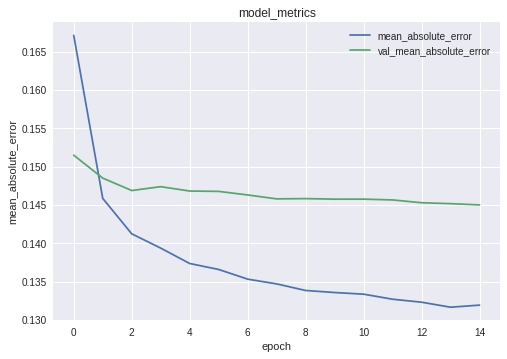

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error', 'val_mean_absolute_error'])
plt.show()

### Plot RMSE

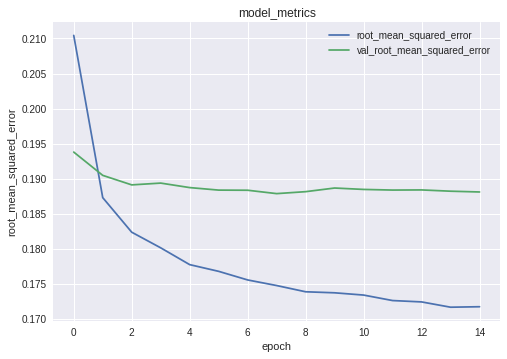

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'])
plt.show()

### Precision Content Based Filtering

#### Membuat Function untuk merekomendasikan 10 movies yang mirip

In [ ]:
def MovieRecommendations(movies_title, similarity_data=cosine_sim_df, 
                         items=movies[['movieId','title','genres']], k=10):
  
    ''' Mengambil data menggunakan argpartition untuk partisi secara tidak langsung,
    sepanjang sumbu yang diberikan, kemudian dataframe diubah menjadi numpy Range 
    dengan parameter sebagai berikut (start, stop, step) '''
    index = similarity_data.loc[:, movies_title].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop movie_title agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movies_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

##### Rekomendasi movies dengan Content Based Filtering


In [ ]:
# Check data lengkap sebuah title 
find_title = movies[movies['title'] == 'Mean Streets (1973)']
find_title

,movieId,title,genres
5094,8042,Mean Streets (1973),Crime|Drama


> Dapat dilihat bahwa judul film `Mean Streets (1973)` memiliki genre Crime & Drama

In [ ]:
movie_title = 'Mean Streets (1973)'
movie_recomend = MovieRecommendations(movie_title)
movie_recomend

,title,movieId,genres
0,People I Know (2002),6330,Crime|Drama
1,"United States of Leland, The (2003)",7377,Crime|Drama
2,Above the Rim (1994),409,Crime|Drama
3,Road to Perdition (2002),5464,Crime|Drama
4,"Virgin Spring, The (Jungfrukällan) (1960)",7820,Crime|Drama
5,Who'll Stop the Rain (1978),4695,Crime|Drama
6,"Prophet, A (Un Prophète) (2009)",73344,Crime|Drama
7,Tsotsi (2005),44204,Crime|Drama
8,"Godfather: Part II, The (1974)",1221,Crime|Drama
9,Tattooed Life (Irezumi ichidai) (1965),63768,Crime|Drama


> Dari 10 rekomendasi yang sistem berikan, 10 judul movie tersebut memiliki genre yang sama dengan `Mean Streets (1973)` yaitu Crime & Drama